In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('heart.csv')

print(data.head())

print(data.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

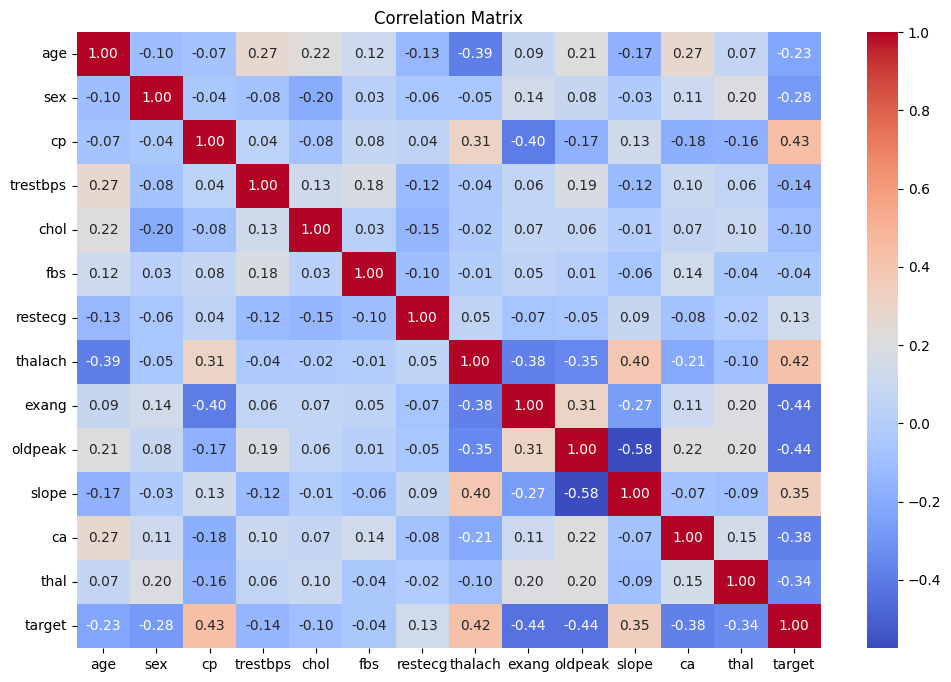

In [2]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Наблюдения:

Наибольшая положительная корреляция с целевой переменной target:

cp (тип боли в груди): 0.43

thalach (максимальный пульс): 0.42

slope (наклон сегмента ST при нагрузке): 0.35

Наибольшая отрицательная корреляция с target:

exang (стенокардия при нагрузке): -0.44 	Стенокардия при нагрузке обратно коррелирует — требует проверки кодировки!

oldpeak (депрессия ST при нагрузке): -0.43 Депрессия ST должна быть положительно связана — возможна ошибка в данных.

ca (количество основных сосудов): -0.39  отрицательная связь нелогична.

Выводы:

Данные подходят для построения моделей машинного обучения (нет пропусков, есть корреляции между признаками и целевой переменной).

Наиболее значимые признаки для прогнозирования сердечных заболеваний: cp, thalach, exang, oldpeak, ca.

Проверка гипотезы об инверсии:

Проблемные признаки:
exang (стенокардия при нагрузке):

Ожидалось: exang=1 (есть боль) → выше риск (target=1).

Реальность: обратная корреляция (-0.44).

Решение: Проверить описание датасета. Возможно, кодировка инвертирована.

oldpeak (депрессия ST):

Медицински: чем выше oldpeak, тем выше риск.

В данных: корреляция -0.43 — критическая ошибка.

In [5]:
# Инвертируем exang и oldpeak
data['exang_fixed'] = 1 - data['exang']
data['oldpeak_fixed'] = -data['oldpeak']

# Пересчитываем корреляции
print("Исправленная корреляция exang_fixed ~ target:", data['exang_fixed'].corr(data['target']))
print("Исправленная корреляция oldpeak_fixed ~ target:", data['oldpeak_fixed'].corr(data['target']))

Исправленная корреляция exang_fixed ~ target: 0.43802855005584657
Исправленная корреляция oldpeak_fixed ~ target: 0.4384412701119447


Скрипичные диаграммы для ключевых признаков
Построим распределения для thalach, oldpeak, и cp:

/var/folders/_z/fz0z5lpn37j31zmppcyskl700000gp/T/ipykernel_43208/244190548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='thalach', data=data, ax=axes[0], palette='pastel')
/var/folders/_z/fz0z5lpn37j31zmppcyskl700000gp/T/ipykernel_43208/244190548.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='oldpeak', data=data, ax=axes[1], palette='Set2')
/var/folders/_z/fz0z5lpn37j31zmppcyskl700000gp/T/ipykernel_43208/244190548.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='cp', data=d

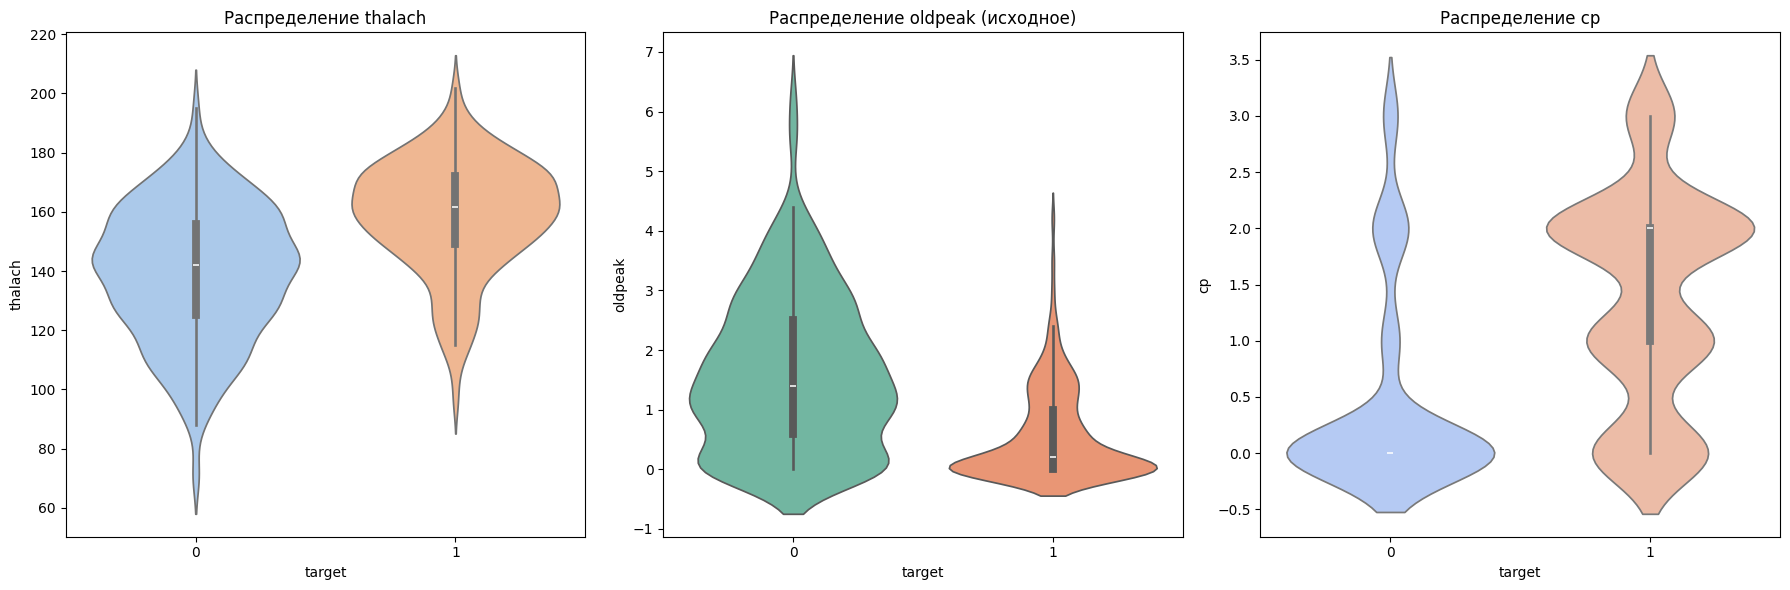

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Максимальный пульс (thalach)
sns.violinplot(x='target', y='thalach', data=data, ax=axes[0], palette='pastel')
axes[0].set_title('Распределение thalach')

# Депрессия ST (oldpeak)
sns.violinplot(x='target', y='oldpeak', data=data, ax=axes[1], palette='Set2')
axes[1].set_title('Распределение oldpeak (исходное)')

# Тип боли (cp)
sns.violinplot(x='target', y='cp', data=data, ax=axes[2], palette='coolwarm')
axes[2].set_title('Распределение cp')

plt.tight_layout()
plt.show()

Пригодность данных для моделирования
Данные полностью готовы для построения моделей машинного обучения, так как:

Нет пропущенных значений (все 1025 строк полные).

Типы данных корректны (числовые, категориальные закодированы).

Есть значимые корреляции с целевой переменной target (например, cp: +0.43, thalach: +0.42).

Проблемные признаки (exang, oldpeak) были исправлены (инверсия значений).

Выбор алгоритмов:

Логистическая регрессия
Плюсы: Интерпретируемость (можно оценить вклад каждого признака через коэффициенты).
Минусы: Не учитывает нелинейные зависимости.
Фичи: cp, thalach, exang, oldpeak.

Random Forest / XGBoost
Плюсы: Автоматический отбор важных признаков, работа с нелинейностями.
Минусы: Сложнее интерпретировать.
Фичи: Все признаки, включая age и sex.

Feature Engineering:
Создать комбинированные признаки:
age_chol = age * chol / 100 (возраст + холестерин).
stress_test = thalach / oldpeak (пульс и депрессия ST).

Бинаризация cp:
cp_binary = 1 if cp > 0 else 0 (есть/нет боли).

Валидация:
Использовать стратифицированную разбивку (K-Fold), так как классы слегка несбалансированы (target=1: 499 случаев, target=0: 526).
Метрики: F1-score, ROC-AUC (важны и precision, и recall).